# Business Case - Hotel Customer Segmentation

This notebook is related to the **Business Case - Customer Segmentation**, in the 'Business Cases with Data Science' course, Nova IMS.

March - 2020

Project duration: **2 weeks**

All project deliverables were prepared by a team of 4:

* Alexandra Ordina
* Bojan Stavrijk
* Henrique Januário
* Hugo Mentzingen

<div class="alert alert-block alert-info">

The project follows **CRISP-DM process model** and includes the following stages:

* Business understanding
* Data understanding
* Data preparation
* Modeling
* Evaluation
* Deployment

Presentation of the case can be found here: **link to document**
</div>

# Summary

**Client is a hotel chain operating several hotels in different locations in Portugal**

**Business goal:**
As the current customer segmentations became inadequate and only reflected sales origin, the goal was to develop new segmentation and include demographic and behavioral characteristics of the customers. The new segmentation aim was to help outline the marketing strategy and help retain current clients and expand client database.

**Data Mining goals and criteria:**
 - Data exploration and insights
 - Clustering model to define meaningful segments
 
<div class="alert alert-block alert-info">

**Solution:**

Segmentation model: **K-means clustering**

We evaluated data quality of current dataset and made several suggestions for improvement. We also applied several data transformations for feature engineering and used PCA to reduce dimensionality and speed up model development.
</div>

**Dataset description:**
 - ID: Customer ID
 - Nationality: Nationality of the customer in ISO 3166-1 (Alpha 3) format
 - Age: Age of the customer
 - DaysSinceCreation: Number of elapsed days since the customer was created
 - NameHash: Hash of the customer name
 - DocIDHash: Hash of the customer personal document identification number (usually passport or ID card)
 - AverageLeadTime: Average number of days before arrival date the customer makes bookings
 - LodgingRevenue: Total amount of lodging revenue paid by the customer so far
 - OtherRevenue: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
 - BookingsCanceled: Number of bookings the customer made but ubsequently canceled
 - BookingsNoShowed: Number of bookings the customer made but subsequently made a "no-show"
 - BookingsCheckedin: Number of bookings the customer made, which actually ended up staying
 - PersonNights: Total person/nights the customer has stayed at the hotel so far. 
 - RoomNights: Total of room/nights the customer has stayed at the hotel so far. 
 - MarketSegment: Current market segment of the customer
 - SRHighFloor: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)
 - SRLowFloor: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)
 - SRAccessibleRoom: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
 - SRMediumFloor: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)
 - SRBathtub Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
 - SRShower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)
 - SRCrib: Indication if the customer usually asks for a crib (0: No, 1: Yes)
 - SRKingSizeBed: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)
 - SRTwinBed Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)
 - SRNearElevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)
 - SRAwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)
 - SRNoAlcoholInMiniBar: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)
 - SRQuietRoom: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)


### **Modules/packages loading**

In [1]:
#!pip install category_encoders

In [4]:
import os
import csv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import plotly.offline as py
import plotly.graph_objs as go
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from plotly import tools

### **Data loading and understanding**

In [5]:
# Load data
ds = pd.read_csv('https://drive.google.com/uc?export=download&id=1MWZUMDdnX1rfiGnXx2FLJ40c_h2IlnF0', sep=";")

In [6]:
# Data info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
ID                      111733 non-null int64
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMe

In [7]:
# Display top 5 rows
ds.head(5)

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  52.0                440   
1   2         PRT   NaN               1385   
2   3         DEU  32.0               1385   
3   4         FRA  61.0               1385   
4   5         FRA  52.0               1385   

                                            NameHash  \
0  0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
1  0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
2  0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
3  0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
4  0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   

                                           DocIDHash  AverageLeadTime  \
0  0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
1  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
2  0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
3  0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
4  0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   

   LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
0           292.0          82.3                 1  ...              0   
1           280.0          53.0                 0  ...              0   
2             0.0           0.0                 0  ...              0   
3           240.0          60.0                 0  ...              0   
4             0.0           0.0                 0  ...              0   

   SRBathtub  SRShower  SRCrib SRKingSizeBed SRTwinBed  SRNearElevator  \
0          0         0       0             0         0               0   
1          0         0       0             0         0               0   
2          0         0       0             0         0               0   
3          0         0       0             0         0               0   
4          0         0       0             0         0               0   

   SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                   0                     0            0  
1                   0                     0            0  
2                   0                     0            0  
3                   0                     0            0  
4                   0                     0            0  

[5 rows x 29 columns]

In [8]:
# Dataframe 'a' is going to be used as a means of studying our relevant data
# Since the removal of clients with zero revenue is very simple and makes such a big cut on our data, we decided
# to proceed with our Data understanding on this intermediate dataframe
a=ds[~((ds['LodgingRevenue']==0)&(ds['OtherRevenue']==0))]
print(a.shape)

(78196, 29)


We analised lodging revenue and found that 29% of our data is of customers that don't provide us any revenue due to legacy systems, staff bookings or special offers. This customers will be removed before segmentation.

In [9]:
# How many customers with no check-ins and some revenue?
# this could be explained by customers that use rooms for other things (conferences for example), so this is still relevant data.
a[a['BookingsCheckedIn']==0].shape

(1, 29)

In [10]:
# Checking for duplicates in the 'DocIDHash' column.
a[a['DocIDHash'].duplicated()].pivot_table(index=['DocIDHash'], aggfunc='size').sort_values(ascending=False).head(5)

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    2815
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      30
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      23
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      13
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      13
dtype: int64

We see that there are duplicates and, we assume it must be due to a system or employee pattern, for example: using a generic code instead of client details

In [11]:
# Do these DocIDHash duplicate entries have the same client name? In some cases, yes.
a[a[['DocIDHash','NameHash']].duplicated()].groupby('DocIDHash')['NameHash'].count().sort_values(ascending=False).head(5)

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    192
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B     22
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52     18
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003     12
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076     10
Name: NameHash, dtype: int64

We assume that these duplicate pairs (NameHash and DocIDHash) must be due to system or employee patterns when the customer doesn't present the ID. 
We accept a minimum noise in the data, assuming that in most of the cases they will be different customers.

In [12]:
# Verifying how many null entries exist
for c in a.columns:
    if a[c].isna().sum()!=0:
        print("%s:" % c, a[c].isna().sum())

Age: 2957
DocIDHash: 5


In [13]:
# Percentage of rows not containing the Age value
print('{:.1%}'.format(a['Age'].isna().sum()/a.shape[0]))

3.8%


We can see that we have some missing data, only when considering age or DocIDHash.

For the missing age, we try to predict them if we have high accuracy on the algorithm (since it might be useful for the segmentation of our clients), if not we drop them.

For the missing docidhash, we take into consideration that this won't be used for segmentation and might be a consequence of usual course of business

3.8% of the data doesn't have the 'Age' value. Remove the rows or use algortihm to classify the data? (kNN?) The decision will be taken in the data preparation section.

In [14]:
# Summary statistics for all variables
summary=a.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

count unique  \
ID                    78196    NaN   
Nationality           78196    185   
Age                   75239    NaN   
DaysSinceCreation     78196    NaN   
NameHash              78196  75224   
DocIDHash             78191  72316   
AverageLeadTime       78196    NaN   
LodgingRevenue        78196    NaN   
OtherRevenue          78196    NaN   
BookingsCanceled      78196    NaN   
BookingsNoShowed      78196    NaN   
BookingsCheckedIn     78196    NaN   
PersonsNights         78196    NaN   
RoomNights            78196    NaN   
DistributionChannel   78196      4   
MarketSegment         78196      7   
SRHighFloor           78196    NaN   
SRLowFloor            78196    NaN   
SRAccessibleRoom      78196    NaN   
SRMediumFloor         78196    NaN   
SRBathtub             78196    NaN   
SRShower              78196    NaN   
SRCrib                78196    NaN   
SRKingSizeBed         78196    NaN   
SRTwinBed             78196    NaN   
SRNearElevator        78196    NaN   
SRAwayFromElevator    78196    NaN   
SRNoAlcoholInMiniBar  78196    NaN   
SRQuietRoom           78196    NaN   

                                                                    top  \
ID                                                                  NaN   
Nationality                                                         FRA   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
NameHash              0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A9...   
DocIDHash             0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq         mean        std  min      25%      50%  \
ID                      NaN        47568    31809.6    1  20703.8  40307.5   
Nationality           11468          NaN        NaN  NaN      NaN      NaN   
Age                     NaN       48.065    15.1966  -10       37       48   
DaysSinceCreation       NaN      692.123    376.878   36      378    711.5   
NameHash                 21          NaN        NaN  NaN      NaN      NaN   
DocIDHash              2816          NaN        NaN  NaN      NaN      NaN   
AverageLeadTime         NaN      86.7569    89.8424   -1       16       57   
Lodgin

In [15]:
# Exploring Distribution Channel (categorical data)
# MarketSegment isn't taken into account since it's older segmentation data
a.groupby('DistributionChannel')['ID'].count()

DistributionChannel
Corporate                 2818
Direct                   10879
GDS Systems                657
Travel Agent/Operator    63842
Name: ID, dtype: int64

In [16]:
a.groupby('DistributionChannel')['LodgingRevenue','OtherRevenue'].sum()

LodgingRevenue  OtherRevenue
DistributionChannel                                
Corporate                1.027637e+06     211608.75
Direct                   4.981176e+06    1089448.70
GDS Systems              2.011561e+05      24981.11
Travel Agent/Operator    2.550559e+07    5901164.96

Most Revenue comes from travel agent/Operator, followed by Direct, then Corporate, then GDS.
Client wise, the order is also the same.

In [17]:
# Check counts of Nationality
a['Nationality'].value_counts().head(5)

FRA    11468
PRT    10712
DEU    10407
GBR     8071
ESP     4613
Name: Nationality, dtype: int64

We can easily see **the top 5 most important markets:**

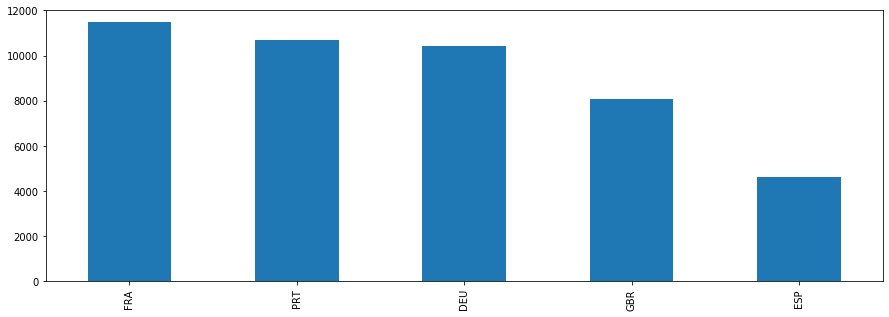

In [19]:
a['Nationality'].value_counts().head(5).plot.bar(figsize=(15,5))

In [24]:
# Checking for Ages below zero
a[a['Age']<0].shape[0]

12

In [25]:
# Number of entries with AverageLeadTime lower than 0
a[a['AverageLeadTime']<0].shape[0]

13

We can see from the code above that 'Age' has some invalid values (below zero and 115 as the maximum age). The 'AverageLeadTime' may also have invalid values, since the minimum is -1. Since they are just a few entries, they will be considered as mistyping or system errors (noise) and the rows will be mantained at the dataset for now. These errors may be removed in the outlier treatment. Regarding the 'Age' feature, the negative values will be encoded to NaNs when binned.

In [26]:
# Check counts of Special Requests variables (other than Nationality and distribution Channel)
# Market Segment isn't taken into account since it is an earlier segmentation, and we don't consider it relevant for
# our purposes
special_requests = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
               'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
a[special_requests].apply(pd.Series.value_counts)

SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
0        74969       78099             78175          78133      77972   
1         3227          97                21             63        224   

   SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
0     78066   77378          50444      66747           78168   
1       130     818          27752      11449              28   

   SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0               77903                 78186        71450  
1                 293                    10         6746

The Special Requests variables appear to have low variance overall. The exceptions to that, the variables concerning the bed size, appear not to be relevant to a customer segmentation. Therefore, the SR variables will not be used during segmentation, excepting the SRCrib variable that will be transformed into a 'Family marker' to be tested during segmentation. 

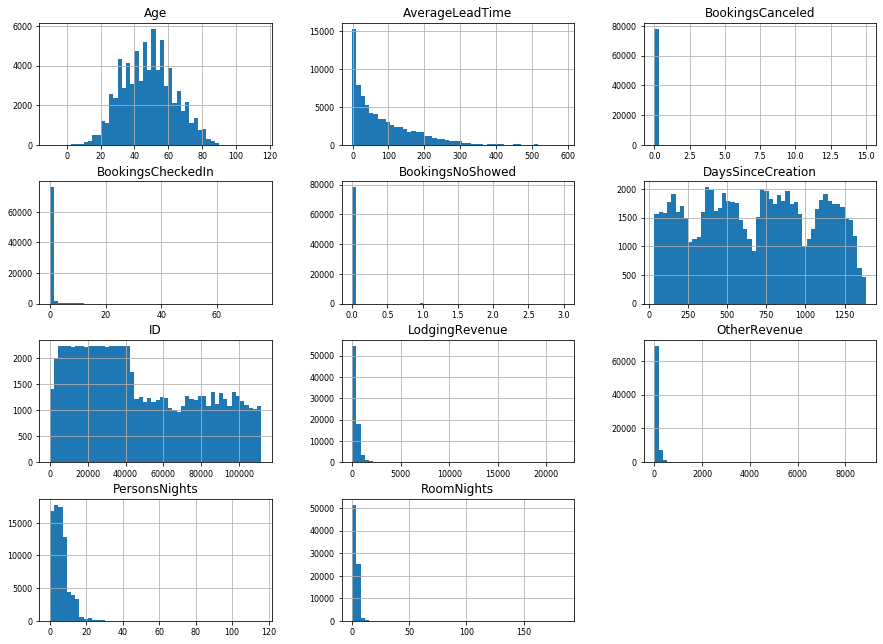

In [27]:
# Histograms on all numerical variables
numerical=a.select_dtypes(include=[np.number])
numerical = [col for col in numerical.columns if ('SR' not in col)]
n_col = 3
n_row = math.ceil(a[numerical].shape[1]/n_col)
a[numerical].hist(bins=50, figsize=(15, a[numerical].shape[1]), layout=(n_row, n_col), xlabelsize=8, ylabelsize=8);

In [28]:
a['BookingsCheckedIn'].value_counts().loc[lambda x : x>50]

1    76166
2     1616
3      194
4       52
Name: BookingsCheckedIn, dtype: int64

In [29]:
a['BookingsCanceled'].value_counts().loc[lambda x : x>50]

0    78042
1      117
Name: BookingsCanceled, dtype: int64

In [30]:
a['BookingsNoShowed'].value_counts().loc[lambda x : x>50]

0    78139
Name: BookingsNoShowed, dtype: int64

In [31]:
a['PersonsNights'].value_counts().loc[lambda x : x>50]

6     16305
4     12857
2     11701
8     10242
1      5073
3      4925
10     4293
12     3928
9      2250
14     1845
5      1110
15      864
16      659
18      492
21      412
7       289
20      276
24      161
28       91
30       53
22       51
Name: PersonsNights, dtype: int64

In [32]:
a['RoomNights'].value_counts().loc[lambda x : x>50]

3     20667
2     17382
4     14042
1     13492
5      6243
7      2569
6      2416
8       505
9       268
10      199
11       96
12       71
14       53
Name: RoomNights, dtype: int64

In [33]:
pd.options.display.float_format = '{:.2f}'.format
a[numerical].var()

ID                  1011849084.42
Age                        230.94
DaysSinceCreation       142036.87
AverageLeadTime           8071.66
LodgingRevenue          156012.70
OtherRevenue             19258.26
BookingsCanceled             0.01
BookingsNoShowed             0.00
BookingsCheckedIn            0.43
PersonsNights               19.26
RoomNights                   4.62
dtype: float64

Since ‘BookingsCanceled’ and ‘BookingsNoShowed’, don't have enough variability these variables will be removed from our segmentation.

BookingsCheckedIn may also be deleted, depending on further analysis.

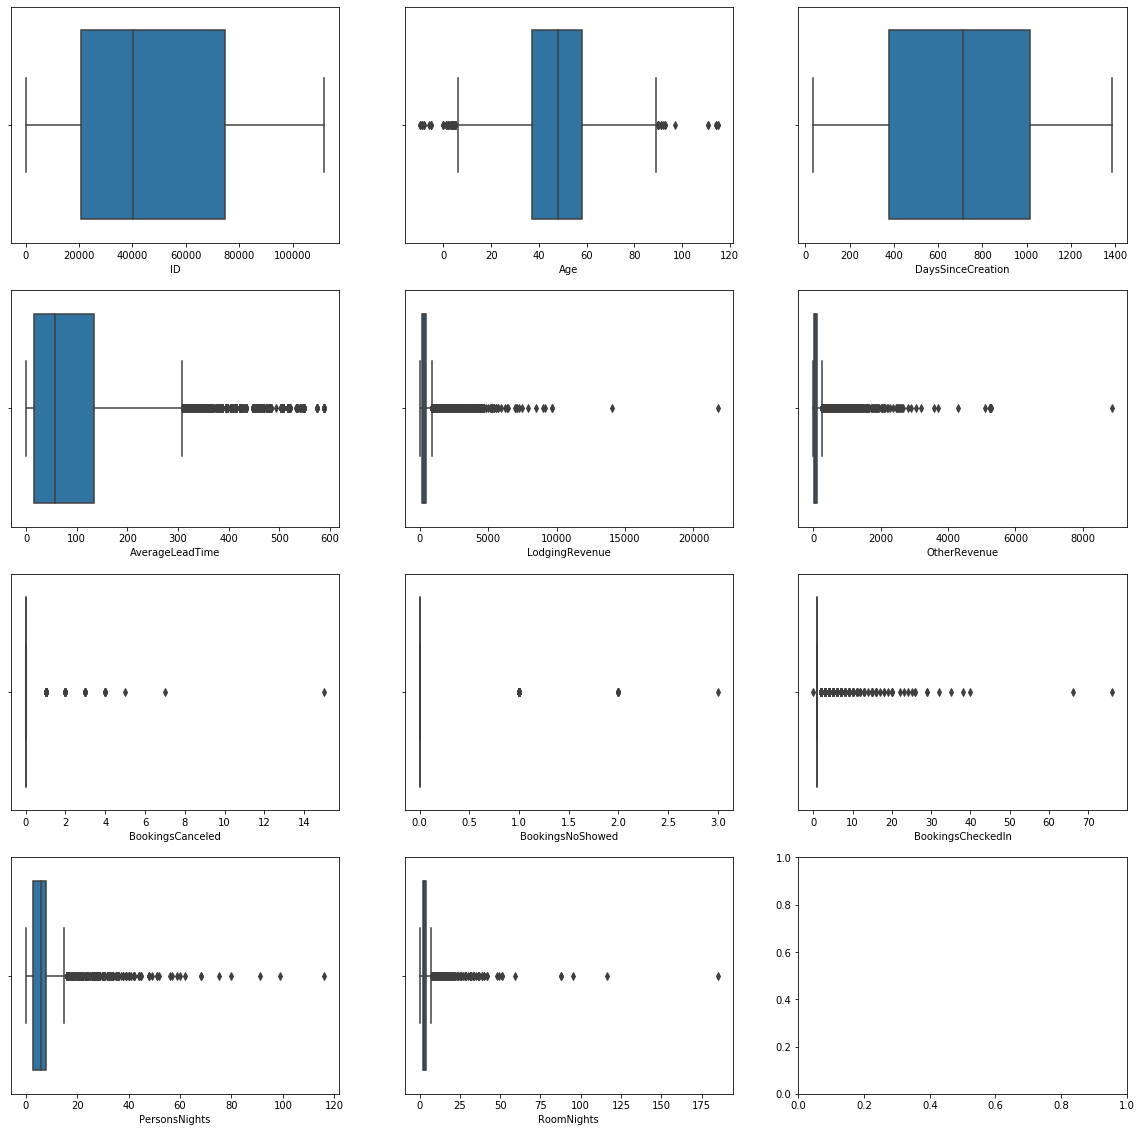

In [34]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(n_row, n_col, figsize=(20, 20))
for var, subplot in zip(a[numerical], ax.flatten()):
    sns.boxplot(a[var], ax=subplot)

We can see that we have few clear outliers in our data, which we will treat according to our strategy.

In [35]:
# number of bookings not cancelled to prove that we have very few outliers - Full (simplified) data is 78196 rows
# since almost all of our customers have both BookingsCanceled and BookingsNoShowed euqual to zero, 
# this data is irrelevant to our segmentation in our opinion
print(a[a.BookingsCanceled == 0].shape[0],a[a.BookingsNoShowed == 0].shape[0])

78042 78139


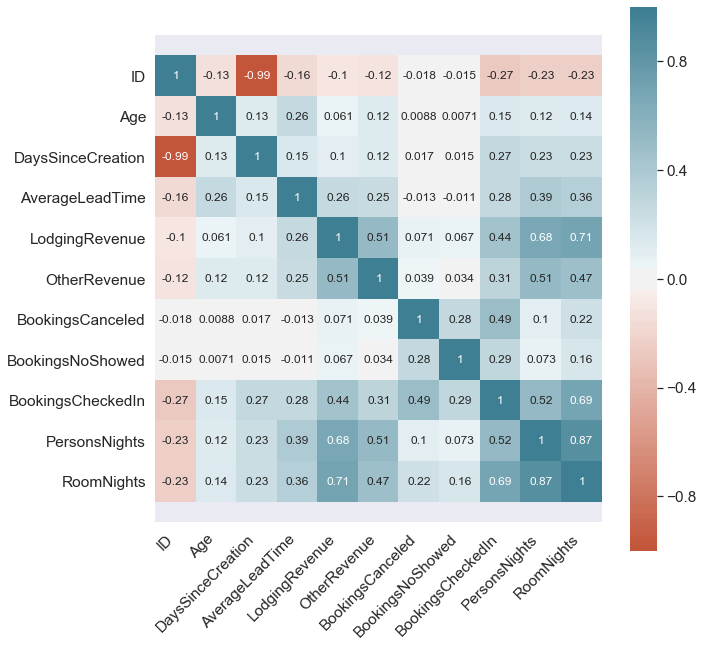

In [36]:
# Plot correlation heatmap of all numeric variables
# here we use both dataframes (simplified and original), to check that the correlation between variables still stands
# even after we delete 30% of our dataframe
corr = ds[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

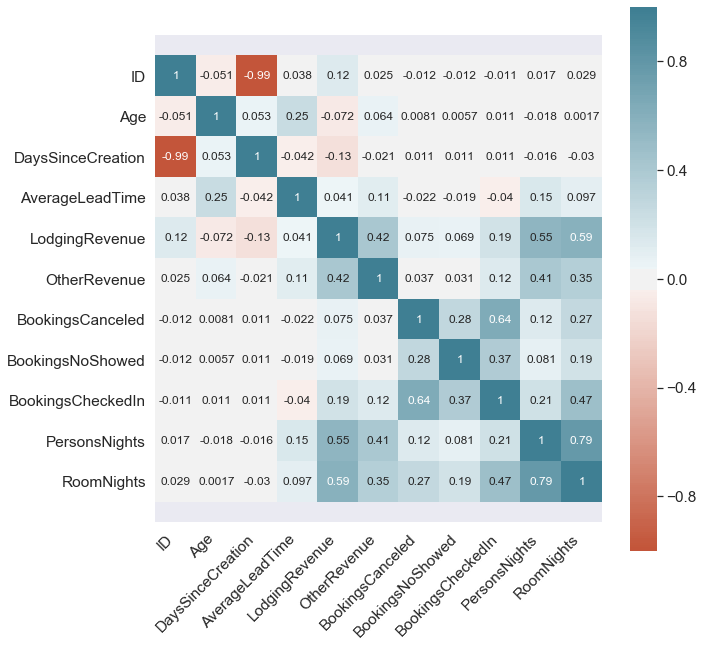

In [37]:
corr = a[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can see that the correlation between variables stays mostly the same, so our decisions will be coherent independently of removing the clients with zero revenue.

PersonsNights and RoomNights are highly correlated, and therefore we will not use both in our segmentation, since they represent mostly the same information.

LodgingRevenue and BookingsCheckedIn are also highly correlated with these two variables, meanwhile, we plan on removing at least one between PersonsNights and RoomNights.

Finally, the decision was to create two ratios: RoomNights/BookingsCheckedIn (average length of stay) and PersonNights/RoomNights (average room density - Room_dens). Remove RoomNights and PersonNights.

<div class="alert alert-block alert-info">

### Decisions summary:

*   Remove customers with both Lodging and Other revenue equal to zero;
*   Mantain the single customer with no check-ins and revenue different from zero;
*   Mantain the entries with duplicate DocIdHashes, even with same NameHash;
*   Try to fill de missing Age entries using a classifier. Drop them if a good accuracy is not achieved;
*   Ignore (mantain) the entries with missing DocIdHash;
*   Let the entries with Age below zero be classified as NaNs during the binning procedure;
*   Mantain the AverageLeadTime negative values as is;
*   SR variables will not be used during segmentation, excepting the SRCrib variable that will be transformed into a 'Family marker' to be tested during segmentation;
*   Create a 'Special Requests marker' which represents wheter the client ever made a request before;
*   BookingsCanceled and BookingsNoShowed variables will be removed from the segmentation.
*   Perform outliers treatment using IQR or manually, if IQR doesn't work.
*   Create two ratios: RoomNights/BookingsCheckedIn (average length of stay) and PersonNights/RoomNights (Room_dens).
*   Remove RoomNights and PersonNights.
*   Remove BookingsCheckedIn

</div>

### **Data preparation**

In [37]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [38]:
# Remove the legacy and staff data from the dataset
# Condition 1: if a customer has no revenue ('LodgingRevenue' AND 'OtherRevenue' are equal to zero) AND 'BookingsCheckedIn' is equal to zero, this person has never been
# to the hotel;
# Condition 2: if a customer has no revenue ('LodgingRevenue' AND 'OtherRevenue' are equal to zero) AND 'BookingsCheckedIn' is different from zero, this person represents
# a special offer, the hotel staff, etc.
# We assume that someone can use the hotel facilites without staying on it (SPA? Swimming Pool? Day Use?). In this case the customer will remain in the dataset, withe revenues
# different from zero and 'BookingsCheckedIn' equal to zero.
# They represent about 29% of the data.

X = X[~((X['LodgingRevenue']==0)&(X['OtherRevenue']==0))]

# Create a new variable 'Requests' which represents wheter the client ever made a request before
X_cols = [col for col in X.columns if 'SR' in col]
X['Requests']=(X[X_cols]!= 0).any(axis=1).astype(int)

# Create variable to mark client as family client
X.rename(columns={'SRCrib': 'Family'},inplace=True)

# Create Group Size variable - 1 client will haze Nan value for group size, will be set at zero
# this client is considered to be an exception
X['Room_dens'] = X['PersonsNights']/X['RoomNights']
X['Room_dens'].fillna(0,inplace=True)

# Create length of stay variable - 1 client will haze Nan value for group size, will be set at zero
# this client is considered to be an exception
X['Avglength_stay']=X['RoomNights']/X['BookingsCheckedIn']
X['Avglength_stay'].fillna(0,inplace=True)

In [39]:
cols=['ID','BookingsCanceled', 'BookingsNoShowed',
      'PersonsNights', 'RoomNights', 'MarketSegment','SRHighFloor', 'NameHash', 'DocIDHash',
      'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor','SRBathtub', 
      'SRShower', 'SRKingSizeBed', 'SRTwinBed','SRNearElevator', 'SRAwayFromElevator',
      'SRNoAlcoholInMiniBar','SRQuietRoom']

X.drop(columns=cols,inplace=True)

In [40]:
X.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCheckedIn',
       'DistributionChannel', 'Family', 'Requests', 'Room_dens',
       'Avglength_stay'],
      dtype='object')

In [41]:
# Bin the age
# Transforming it into a categorical variable, since preferences of people vary
# according to age clusters, if you cluster using numerical variable it will result in very
# similar results for age
X['age_bins'] = pd.cut(x=X['Age'], bins=[0, 17, 30, 45, 60, 99], labels=['<18','19-30','31-45','46-60','>=60'])

print(X.isnull().sum())

Nationality               0
Age                    2957
DaysSinceCreation         0
AverageLeadTime           0
LodgingRevenue            0
OtherRevenue              0
BookingsCheckedIn         0
DistributionChannel       0
Family                    0
Requests                  0
Room_dens                 0
Avglength_stay            0
age_bins               2978
dtype: int64


In [42]:
X.drop(columns=['Age'],inplace=True)

In [43]:
# Rescaling the revenue values using DaysSinceCreation, since customers that are in the database for more time will probably have higher revenue values.
X['LodgingRevenue_avg'] = X['LodgingRevenue']/X['BookingsCheckedIn']
X['OtherRevenue_avg'] = X['OtherRevenue']/X['BookingsCheckedIn']

In [44]:
X[X['BookingsCheckedIn']==0]

Nationality  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
70579         PRT                410              114          249.30   

       OtherRevenue  BookingsCheckedIn    DistributionChannel  Family  \
70579         18.00                  0  Travel Agent/Operator       0   

       Requests  Room_dens  Avglength_stay age_bins  LodgingRevenue_avg  \
70579         0       0.00            0.00      NaN                 inf   

       OtherRevenue_avg  
70579               inf

In [45]:
# since this is a single situation created with bookingscheckedin = 0, we're going to drop it since it doesn't influence our segmentation, and just creates 
# unreliable data for average revenue
indexNames = X[X['BookingsCheckedIn']==0].index
X.drop(indexNames,inplace=True)
X.reset_index(drop=True,inplace=True)

In [46]:
X.drop(columns=['LodgingRevenue', 'OtherRevenue', 'BookingsCheckedIn'],inplace=True)

In [47]:
X.quantile([.33,.66])

DaysSinceCreation  AverageLeadTime  Family  Requests  Room_dens  \
0.33             473.00            28.00    0.00      0.00       2.00   
0.66             892.00            99.00    0.00      1.00       2.00   

      Avglength_stay  LodgingRevenue_avg  OtherRevenue_avg  
0.33            2.00              226.15             36.00  
0.66            3.00              399.00             86.70

In [48]:
# checking that we don't have any Null values for the averages
X['OtherRevenue_avg'].isnull().value_counts()

False    78195
Name: OtherRevenue_avg, dtype: int64

In [49]:
X['LodgingRevenue_avg'].isnull().value_counts()

False    78195
Name: LodgingRevenue_avg, dtype: int64

In [50]:
print(X.isnull().sum())

Nationality               0
DaysSinceCreation         0
AverageLeadTime           0
DistributionChannel       0
Family                    0
Requests                  0
Room_dens                 0
Avglength_stay            0
age_bins               2977
LodgingRevenue_avg        0
OtherRevenue_avg          0
dtype: int64


In [51]:
# Bin LodgingRevenue and OtherRevenue
# Transforming it into a categorical variable since the values are scattered and we would like to work with a revenue scale. 
X['lod_rev_bins'] = pd.cut(x=X['LodgingRevenue_avg'], bins=[-np.inf, 226.15, 399.00, np.inf], labels=['Lodging_C','Lodging_B','Lodging_A'])
X['oth_rev_bins'] = pd.cut(x=X['OtherRevenue_avg'], bins=[-np.inf, 36.00, 86.75, np.inf], labels=['Other_C','Other_B','Other_A'])

X.head(5)

Nationality  DaysSinceCreation  AverageLeadTime    DistributionChannel  \
0         PRT                440               59              Corporate   
1         PRT               1385               61  Travel Agent/Operator   
2         FRA               1385               93  Travel Agent/Operator   
3         JPN               1385               58  Travel Agent/Operator   
4         FRA               1385               38  Travel Agent/Operator   

   Family  Requests  Room_dens  Avglength_stay age_bins  LodgingRevenue_avg  \
0       0         0       1.50            2.00    46-60              146.00   
1       0         0       2.00            5.00      NaN              280.00   
2       0         0       2.00            5.00     >=60              240.00   
3       0         0       2.00            2.00    46-60              230.00   
4       0         1       2.00            5.00    31-45              535.00   

   OtherRevenue_avg lod_rev_bins oth_rev_bins  
0             41.15    Lodging_C      Other_B  
1             53.00    Lodging_B      Other_B  
2             60.00    Lodging_B      Other_B  
3             24.00    Lodging_B      Other_C  
4             94.00    Lodging_A      Other_A

In [52]:
# Dropping the average revenue  columns from the original dataframe (X)
X.drop(columns=['LodgingRevenue_avg','OtherRevenue_avg'],inplace=True)

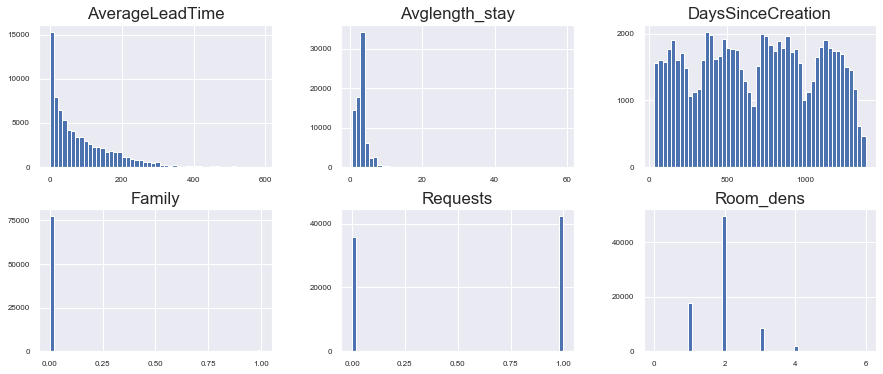

In [53]:
# Check the histograms and boxplots for outlier treatment
numerical=X.select_dtypes(include=[np.number]).columns
n_col = 3
n_row = math.ceil(X[numerical].shape[1]/n_col)
X[numerical].hist(bins=50, figsize=(15, X[numerical].shape[1]), layout=(n_row, n_col), xlabelsize=8, ylabelsize=8);

After cleaning the data and checking their behaviour for segmentation, we found that our created variable 'Family' didn't add any new value to our data, so we are dropping it.

In [54]:
X.drop(columns='Family',inplace=True)
numerical=X.select_dtypes(include=[np.number]).columns

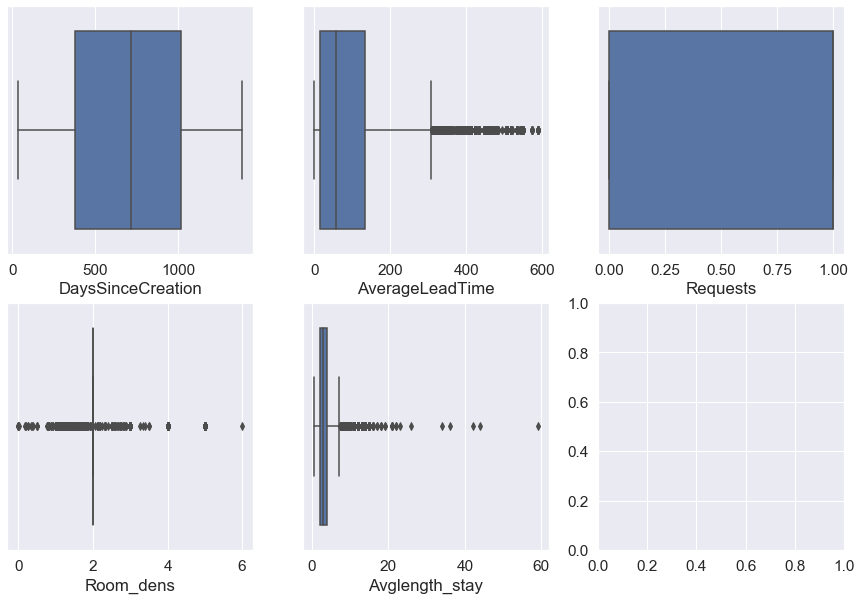

In [55]:
fig, ax = plt.subplots(n_row, n_col, figsize=(15, 10))
for var, subplot in zip(X[numerical], ax.flatten()):
    sns.boxplot(X[var], ax=subplot)

In [56]:
#Function to perform outliers removal based on interquartile range (IQR) 
def removeOutliers(df, cutoff1, features):
    
    outliers_to_remove = []
    for feature in features:
        if feature in df:
            #calculate interquartile range
            q25, q75 = np.nanpercentile(df[feature], 25), np.nanpercentile(df[feature], 75)
            iqr = q75 - q25
            print(feature)
            print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
        
            #calculate the outlier cutoff
            cut_off = iqr * cutoff1
            lower, upper = q25 - cut_off, q75 + cut_off
        
            #identify outliers
            outliers = [index for index, value in df[feature].iteritems() if value < lower or value > upper]
            print('Identified outliers: %d' % len(outliers))
            outliers_to_remove += outliers
    outliers_to_remove = set(outliers_to_remove)
    outliers_to_remove = sorted(outliers_to_remove)
    return outliers_to_remove

In [57]:
# Setting the cutoff to 3 IQR, removing only the most extreme values
features = ['Avglength_stay']
outliers = removeOutliers(X, 3, features)

Avglength_stay
Percentiles: 25th=2.000, 75th=4.000, IQR=2.000
Identified outliers: 241


In [58]:
outliers_data = []
for i in outliers:
    outliers_data.append(X.iloc[i,:])
X.drop(outliers, inplace=True)
outliers_data=pd.DataFrame(outliers_data)
X.shape

(77954, 10)

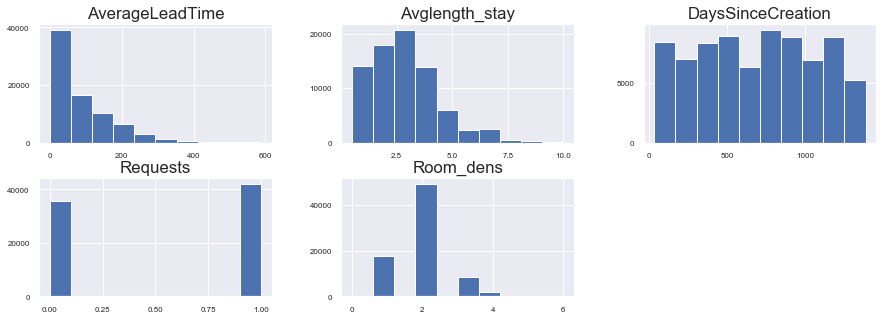

In [59]:
# Check the histograms and boxplots after outlier removal
numerical=X.select_dtypes(include=[np.number]).columns
n_col = 3
n_row = math.ceil(X[numerical].shape[1]/n_col)
X[numerical].hist(bins=10, figsize=(15, X[numerical].shape[1]), layout=(n_row, n_col), xlabelsize=8, ylabelsize=8);

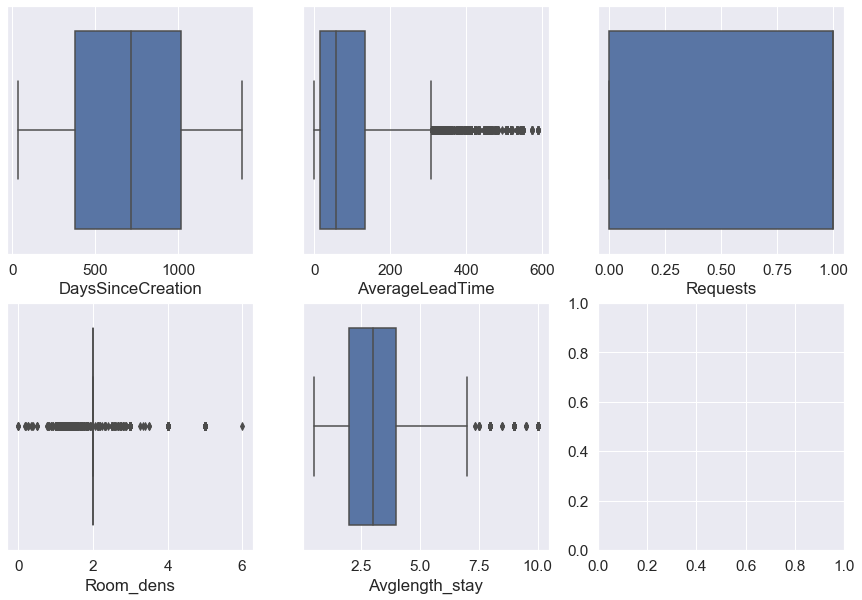

In [60]:
fig, ax = plt.subplots(n_row, n_col, figsize=(15, 10))
for var, subplot in zip(X[numerical], ax.flatten()):
    sns.boxplot(X[var], ax=subplot)

Next we are declaring functions to try predicting the missing Age values

In [61]:
#Function to split the DataFrame in data complete (without NaNs on the same row) and incomplete
#The rows that belong to the 'incomplete' dataframe have at least one NaN

def split(data, reset_index = False):
    data_complete = pd.DataFrame()
    data_incomplete = data[data.isna().any(axis=1)]
    if reset_index:
        data_incomplete.reset_index(inplace=True)
        data_incomplete.drop('index', axis=1, inplace=True)
    data_complete = data[~data.isna().any(axis=1)]
    return data_complete, data_incomplete

In [62]:
#Function to evaluate the best n_neighbors to use with KNN
def evaluateClassifier(data):
    data_complete, data_incomplete = split(data, reset_index=True)

    def createAndFitClassifier(k):
        clf = KNeighborsClassifier(n_neighbors=k)    
        incomplete = data_incomplete.copy(deep=True)
        complete = data_complete.copy(deep=True)
        X_train, X_test, y_train, y_test = train_test_split(complete.loc[:,complete.columns != value].values,
                                                            complete.loc[:,value].values, test_size = 0.2, random_state = 0)
        trained_model = clf.fit(X_train, y_train)
        result = [clf, y_test, X_test, trained_model, incomplete, complete]
        return result
    
    accuracies_for_value_dict = {}

    for index, value in enumerate(['age_bins']):

        accuracy_dict = {}

        for k in range(3,25):

            result = createAndFitClassifier(k)
            clf = result[0]
            y_test = result[1]
            X_test = result[2]                                                
            
            #calculate the model accuracy and storing the value into a dictionary
            y_pred = clf.predict(X_test)
            accuracy_matrix = confusion_matrix(y_test, y_pred)
            accuracy = accuracy_matrix.trace()/accuracy_matrix.sum()
            accuracy_dict[k] = accuracy
        
        accuracies_for_value_dict[value] = accuracy_dict
    
    return accuracies_for_value_dict

In [63]:
#Function that uses KNN to classify the missing values on 'age_bins' column
def classifyCategoricalData(data, n_neighbors_dict):
    data_complete, data_incomplete = split(data, reset_index=True)
  
    #Creating a classifier to fill the categorical data: age_bins
      
    for index, value in enumerate(['age_bins']):

        if value in n_neighbors_dict:
            clf = KNeighborsClassifier(n_neighbors=n_neighbors_dict[value])    
        
            incomplete = data_incomplete.copy(deep=True)
            complete = data_complete.copy(deep=True)
        
            X_train, X_test, y_train, y_test = train_test_split(complete.loc[:,complete.columns != value].values,
                                                            complete.loc[:,value].values, test_size = 0.2, random_state = 0)
        
            trained_model = clf.fit(X_train, 
                                 y_train)
              
            prediction = trained_model.predict(incomplete.loc[:,incomplete.columns != value])
            temp_df = pd.DataFrame(prediction.reshape(-1,1), columns = [value])
        
            #now we are filling data_incomplete 
            for ind in range(len(temp_df)):
                if np.isnan(data_incomplete[value][ind]):
                    data_incomplete[value][ind] = temp_df[value][ind]


        #and reconstructing the original dataframe
        dataset = pd.concat([data_complete, data_incomplete])
        dataset.set_index(dataset['Customer Identity'] - 1, inplace=True)
    
    return dataset

In [64]:
# Function to rescale the dataframe columns (1)
def rescale(data):
    
    data_ = data.copy(deep=True)
    numerical = data.select_dtypes(include=[np.number],exclude='bool').columns.tolist()
    
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(data_[numerical])
    scaled_features = pd.DataFrame(scaled_features, columns = data_[numerical].columns)
    scaled_data = pd.merge(scaled_features, data_[data_.columns.difference(numerical)], left_index=True, right_index=True)

    return scaled_data

In [65]:
# Preparing to verify the optimal n_neighbors to our KNN classifier
data = X.copy(deep=True)
scaled_data = rescale(data)
scaled_data.drop(['DaysSinceCreation','Nationality'], axis=1, inplace=True)

#Encoding the categorical variables and returning back the NaN's
columns_to_encode = ['DistributionChannel', 'lod_rev_bins', 'oth_rev_bins']

for i in columns_to_encode:
  scaled_data[i] = scaled_data[i].apply(str)

  labelencoder_X = LabelEncoder()

  scaled_data.loc[:,i] = labelencoder_X.fit_transform(scaled_data.loc[:,i])

# verify the optimal n_neighbors to our KNN classifier
accuracies_for_column_dict = evaluateClassifier(scaled_data)

C:\Users\Sasha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



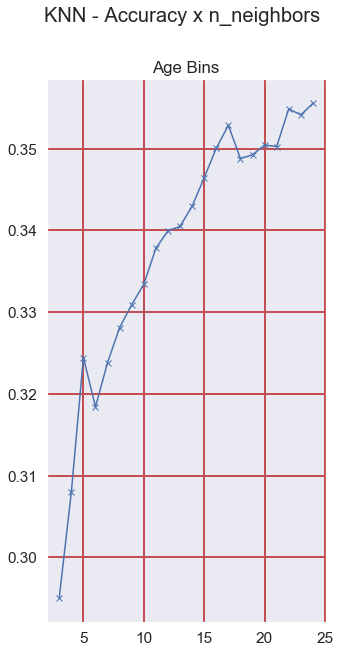

In [66]:
# Plotting the accuracy X number of neighbors used in the classifier
fig, ax = plt.subplots(1, figsize=(5,10))
fig.suptitle('KNN - Accuracy x n_neighbors')
ax.plot(list(accuracies_for_column_dict['age_bins'].keys()),
                                    list(accuracies_for_column_dict['age_bins'].values()),
                                    'bx-') 
ax.set_title('Age Bins')
ax.grid(True, which='both', color='r', linestyle='-', linewidth=2)

plt.show()

In [76]:
# Since the 'age_bins' regression didn't result in a good accuracy, we are removing the entries with missing Age.
for c in X.columns:
    if X[c].isna().sum()!=0:
        print("%s:" % c, X[c].isna().sum())
X.dropna(inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77954 entries, 0 to 77953
Data columns (total 19 columns):
AverageLeadTime                              77954 non-null float64
DistributionChannel_Corporate                77954 non-null float64
DistributionChannel_Travel Agent/Operator    77954 non-null float64
DistributionChannel_Direct                   77954 non-null float64
DistributionChannel_GDS Systems              77954 non-null float64
Requests                                     77954 non-null float64
Room_dens                                    77954 non-null float64
Avglength_stay                               77954 non-null float64
age_bins_<18                                 77954 non-null float64
age_bins_19-30                               77954 non-null float64
age_bins_31-45                               77954 non-null float64
age_bins_46-60                               77954 non-null float64
age_bins_>=60                                77954 non-null float64
lod_rev

In [67]:
X.head(5)

Nationality  DaysSinceCreation  AverageLeadTime    DistributionChannel  \
0         PRT                440               59              Corporate   
1         PRT               1385               61  Travel Agent/Operator   
2         FRA               1385               93  Travel Agent/Operator   
3         JPN               1385               58  Travel Agent/Operator   
4         FRA               1385               38  Travel Agent/Operator   

   Requests  Room_dens  Avglength_stay age_bins lod_rev_bins oth_rev_bins  
0         0       1.50            2.00    46-60    Lodging_C      Other_B  
1         0       2.00            5.00      NaN    Lodging_B      Other_B  
2         0       2.00            5.00     >=60    Lodging_B      Other_B  
3         0       2.00            2.00    46-60    Lodging_B      Other_C  
4         1       2.00            5.00    31-45    Lodging_A      Other_A

In [68]:
X.reset_index(drop=True,inplace=True)
X_beforeEncoding = X.copy(deep=True)

In [69]:
#One hot encoding
# Encode categorical variables to dummy variables
cols = ['DistributionChannel', 'age_bins', 'lod_rev_bins', 'oth_rev_bins']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [70]:
extra_data=X.loc[:,['Nationality','DaysSinceCreation']]
X.drop(columns=['Nationality','DaysSinceCreation'],inplace=True)

In [71]:
# Get a copy of the dataframe before normalization
X_beforeNorm = X.copy(deep=True)

# Normalize all columns
cols = list(X.columns) # save the name of the columns
X_array = X.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_array)
X = pd.DataFrame(X_scaled, columns=cols)

In [72]:
X.head(5)

AverageLeadTime  DistributionChannel_Corporate  \
0             0.10                           1.00   
1             0.11                           0.00   
2             0.16                           0.00   
3             0.10                           0.00   
4             0.07                           0.00   

   DistributionChannel_Travel Agent/Operator  DistributionChannel_Direct  \
0                                       0.00                        0.00   
1                                       1.00                        0.00   
2                                       1.00                        0.00   
3                                       1.00                        0.00   
4                                       1.00                        0.00   

   DistributionChannel_GDS Systems  Requests  Room_dens  Avglength_stay  \
0                             0.00      0.00       0.25            0.16   
1                             0.00      0.00       0.33            0.47   
2                             0.00      0.00       0.33            0.47   
3                             0.00      0.00       0.33            0.16   
4                             0.00      1.00       0.33            0.47   

   age_bins_<18  age_bins_19-30  age_bins_31-45  age_bins_46-60  \
0          0.00            0.00            0.00            1.00   
1          0.00            0.00            0.00            0.00   
2          0.00            0.00            0.00            0.00   
3          0.00            0.00            0.00            1.00   
4          0.00            0.00            1.00            0.00   

   age_bins_>=60  lod_rev_bins_Lodging_C  lod_rev_bins_Lodging_B  \
0           0.00                    1.00                    0.00   
1           0.00                    0.00                    1.00   
2           1.00                    0.00                    1.00   
3           0.00                    0.00                    1.00   
4           0.00                    0.00                    0.00   

   lod_rev_bins_Lodging_A  oth_rev_bins_Other_C  oth_rev_bins_Other_B  \
0                    0.00                  0.00                  1.00   
1                    0.00                  0.00                  1.00   
2                    0.00                  0.00                  1.00   
3                    0.00                  1.00                  0.00   
4                    1.00                  0.00                  0.00   

   oth_rev_bins_Other_A  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  1.00

### PCA Analysis

In [73]:
#PCA on numerical data to explore the most important variables with high explanatory power
from sklearn.decomposition import PCA

pca = PCA(n_components= X_scaled.shape[1]) # pca count = count of variables(10)
principalComponents = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'PC Analysis of numerical variables')

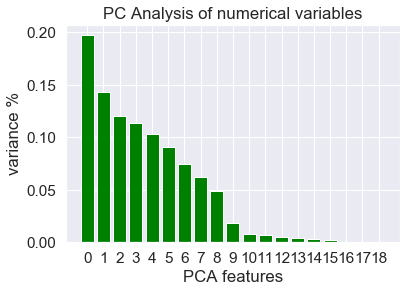

In [74]:
# Plot the explained variances
features=range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.title('PC Analysis of numerical variables')

#pca.components_ # list of eigen values for each PCA
#pca.singular_values_
#pca.inverse_transform(principalComponents)

In [75]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X)
# Show the variance per component
#with 8 components we can explain 95% of variance
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

Component Variance explained  Cumulative variance explained
0           1           0.197119                           0.20
1           2           0.142916                           0.34
2           3           0.119791                           0.46
3           4           0.113773                           0.57
4           5           0.102828                           0.68
5           6           0.090754                           0.77
6           7           0.074058                           0.84
7           8           0.062142                           0.90
8           9           0.048445                           0.95
9          10           0.018544                           0.97
10         11           0.007510                           0.98
11         12           0.007022                           0.98
12         13           0.005189                           0.99
13         14           0.004120                           0.99
14         15           0.003476                           1.00
15         16           0.002313                           1.00
16         17           0.000000                           1.00
17         18           0.000000                           1.00
18         19           0.000000                           1.00

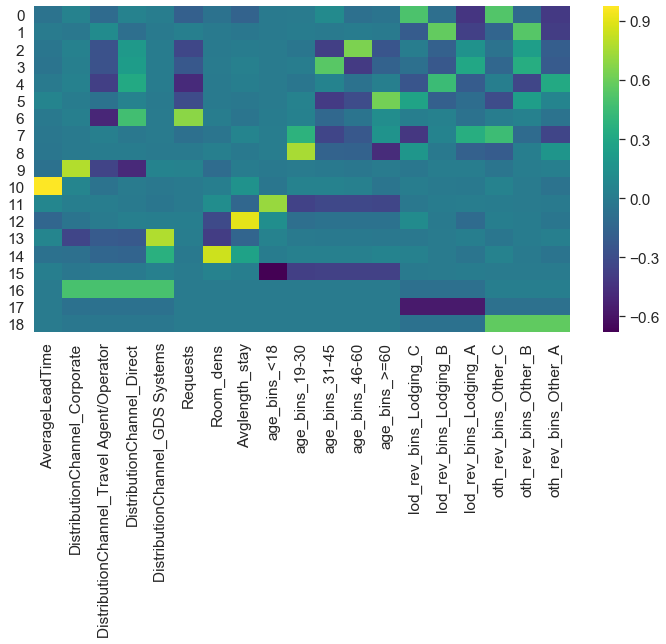

In [77]:
#heatplot to see how the features mixed up to create the components - 2nd version
#1PC = 
map= pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='viridis')

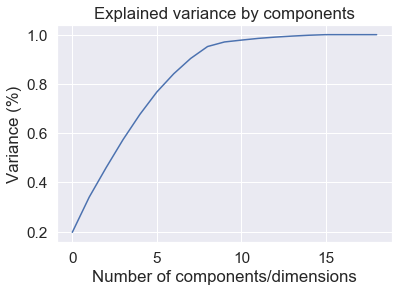

In [78]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

### Modeling - K-Means - X Components

In [79]:
# Apply the dimension reduction to the dataset (for 7 components)
pca_reduced = PCA(n_components = 7)
pca_reduced.fit(X)
X_pca_reduced = pca_reduced.transform(X) 
print(X_pca_reduced.shape)

(77954, 7)


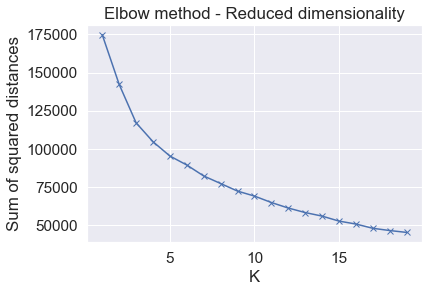

In [80]:
# Select K based on the sum of squared distances
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Plot results
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method - Reduced dimensionality')
plt.show()

In [81]:
from sklearn.metrics import silhouette_samples, silhouette_score
def sil(df,n):
    
    if(n<2):
        print('Error: sil_test can not run, number of clusters has to be at least 2')
    elif(n==2):
        range_n_clusters=list(range(2,4))
    else:
        range_n_clusters=list(range(n-1,n+2))
        
    X=df
    score = -2
    
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters,random_state=123)
        cluster_labels=clusterer.fit_predict(X)        
        
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        
        if silhouette_avg > score:
            score = silhouette_avg
            final = n_clusters
    return final

In [82]:
result = sil(X_pca_reduced,6)
print('Best result for K= %d' % result)

For n_clusters = 5 The average silhouette_score is : 0.27045207428434803
For n_clusters = 6 The average silhouette_score is : 0.24791929749899072
For n_clusters = 7 The average silhouette_score is : 0.27402959872498117
Best result for K= 7


In [83]:
# Apply the K-Means for K=6
K=6
kmeans = KMeans(n_clusters=K, random_state=3000)
kmeans.fit(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

In [84]:
# Count observations per cluster
X_beforeNorm.groupby(y_kmeans).size()

0    15705
1    14509
2    13740
3    11070
4    15721
5     7209
dtype: int64

In [85]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF.head(5)

AverageLeadTime  DistributionChannel_Corporate  \
0            -0.05                           0.05   
1             0.00                          -0.02   
2            -0.03                           0.04   
3            -0.05                           0.03   
4            -0.01                           0.04   

   DistributionChannel_Travel Agent/Operator  DistributionChannel_Direct  \
0                                      -0.11                        0.05   
1                                       0.11                       -0.09   
2                                      -0.26                        0.21   
3                                      -0.26                        0.23   
4                                      -0.37                        0.32   

   DistributionChannel_GDS Systems  Requests  Room_dens  Avglength_stay  \
0                             0.01     -0.18      -0.05           -0.16   
1                            -0.00      0.02      -0.01           -0.03   
2                             0.01     -0.33      -0.00            0.01   
3                             0.01     -0.23       0.00            0.03   
4                             0.01     -0.48      -0.01            0.02   

   age_bins_<18  age_bins_19-30  age_bins_31-45  age_bins_46-60  \
0         -0.01           -0.00            0.10           -0.07   
1         -0.01            0.01           -0.00            0.01   
2         -0.00           -0.03           -0.37            0.65   
3          0.00            0.01            0.54           -0.40   
4          0.00           -0.03            0.06           -0.06   

   age_bins_>=60  lod_rev_bins_Lodging_C  lod_rev_bins_Lodging_B  \
0          -0.05                    0.51                   -0.08   
1          -0.00                   -0.21                    0.58   
2          -0.25                    0.01                   -0.18   
3          -0.17                   -0.08                   -0.23   
4           0.03                   -0.24                    0.45   

   lod_rev_bins_Lodging_A  oth_rev_bins_Other_C  oth_rev_bins_Other_B  \
0                   -0.42                  0.53                 -0.12   
1                   -0.37                 -0.15                  0.54   
2                    0.16                 -0.05                  0.24   
3                    0.31                 -0.13                  0.35   
4                   -0.21                  0.02                 -0.33   

   oth_rev_bins_Other_A  
0                 -0.41  
1                 -0.39  
2                 -0.19  
3                 -0.22  
4                  0.32

In [86]:
# Study the weights of component 7
comp = abs(wheightsDF.iloc[6])  ## id 6 is component 7
comp = comp.sort_values(ascending=False)
comp

Requests                                    0.69
DistributionChannel_Travel Agent/Operator   0.50
DistributionChannel_Direct                  0.47
age_bins_31-45                              0.13
age_bins_>=60                               0.12
lod_rev_bins_Lodging_A                      0.06
oth_rev_bins_Other_A                        0.05
age_bins_46-60                              0.04
age_bins_19-30                              0.04
oth_rev_bins_Other_B                        0.04
Avglength_stay                              0.04
lod_rev_bins_Lodging_B                      0.04
DistributionChannel_Corporate               0.03
lod_rev_bins_Lodging_C                      0.02
Room_dens                                   0.01
AverageLeadTime                             0.01
oth_rev_bins_Other_C                        0.01
age_bins_<18                                0.00
DistributionChannel_GDS Systems             0.00
Name: 6, dtype: float64

In [87]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(X_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF = clustersMeanDF.transpose().sort_index()
clustersMeanDF['feature_avg'] = X_beforeNorm.mean(axis=0)
clustersMeanDF

0     1     2     3     4  \
AverageLeadTime                           117.06 99.24 87.75 91.42 66.20   
Avglength_stay                              2.95  4.69  3.20  3.13  1.92   
DistributionChannel_Corporate               0.01  0.01  0.03  0.02  0.00   
DistributionChannel_Direct                  0.05  0.17  0.10  0.12  0.00   
DistributionChannel_GDS Systems             0.00  0.00  0.00  0.00  0.00   
DistributionChannel_Travel Agent/Operator   0.94  0.81  0.87  0.86  1.00   
Requests                                    0.61  0.62  0.54  0.56  0.52   
Room_dens                                   1.89  2.32  1.95  2.04  1.71   
age_bins_19-30                              0.10  0.12  0.12  0.13  0.13   
age_bins_31-45                              0.25  0.26  0.29  0.28  0.35   
age_bins_46-60                              0.28  0.39  0.35  0.37  0.32   
age_bins_<18                                0.01  0.03  0.01  0.01  0.01   
age_bins_>=60                               0.35  0.18  0.19  0.19  0.13   
lod_rev_bins_Lodging_A                      0.00  1.00  0.64  0.00  0.16   
lod_rev_bins_Lodging_B                      0.87  0.00  0.00  1.00  0.00   
lod_rev_bins_Lodging_C                      0.13  0.00  0.36  0.00  0.84   
oth_rev_bins_Other_A                        0.64  1.00  0.00  0.00  0.10   
oth_rev_bins_Other_B                        0.00  0.00  1.00  1.00  0.00   
oth_rev_bins_Other_C                        0.36  0.00  0.00  0.00  0.90   

                                              5  feature_avg  
AverageLeadTime                           30.94        86.71  
Avglength_stay                             1.62         3.01  
DistributionChannel_Corporate              0.26         0.04  
DistributionChannel_Direct                 0.68         0.14  
DistributionChannel_GDS Systems            0.06         0.01  
DistributionChannel_Travel Agent/Operator  0.00         0.82  
Requests                                   0.26         0.54  
Room_dens                                  1.55         1.93  
age_bins_19-30                             0.10         0.12  
age_bins_31-45                             0.35         0.29  
age_bins_46-60                             0.34         0.34  
age_bins_<18                               0.01         0.01  
age_bins_>=60                              0.12         0.20  
lod_rev_bins_Lodging_A                     0.07         0.34  
lod_rev_bins_Lodging_B                     0.15         0.33  
lod_rev_bins_Lodging_C                     0.78         0.33  
oth_rev_bins_Other_A                       0.05         0.34  
oth_rev_bins_Other_B                       0.10         0.33  
oth_rev_bins_Other_C                       0.84         0.33

In [88]:
clustersMeanDF.round(2).style.background_gradient(cmap='Blues', axis=1, subset=clustersMeanDF.columns != 'feature_avg')

In [89]:
# Verify the size of the dataframe and the k-means clusters before adding the clusters as a new column
print(X_beforeEncoding.shape)
len(y_kmeans)

(77954, 10)


77954

In [90]:
# Add the cluster number as 'Cluster' column
X_beforeEncoding['Cluster'] = pd.Series(y_kmeans, index=X_beforeEncoding.index)

In [91]:
# Save the 10 top countries in customers' number as a list
top_countries = X_beforeEncoding['Nationality'].value_counts().head(10).index.tolist()
top_countries

['FRA', 'PRT', 'DEU', 'GBR', 'ESP', 'USA', 'ITA', 'BEL', 'NLD', 'BRA']

In [92]:
# Save the cluster numbers as a list
clusters = X_beforeEncoding['Cluster'].value_counts().index.sort_values().tolist()
clusters

[0, 1, 2, 3, 4, 5]

In [93]:
# For each cluster, determine the top 5 countries (in customers' number)
for i in range(len(clusters)):
  print(X_beforeEncoding[X_beforeEncoding['Cluster']==i].groupby(['Cluster','Nationality']).size().nlargest())

Cluster  Nationality
0        DEU            2928
         FRA            2311
         GBR            2007
         PRT            1361
         ESP             741
dtype: int64
Cluster  Nationality
1        FRA            2647
         DEU            1806
         GBR            1498
         PRT             943
         ESP             868
dtype: int64
Cluster  Nationality
2        DEU            2111
         FRA            2021
         PRT            1566
         GBR            1392
         ESP             706
dtype: int64
Cluster  Nationality
3        FRA            1792
         DEU            1621
         GBR            1233
         PRT            1019
         ESP             644
dtype: int64
Cluster  Nationality
4        PRT            3013
         FRA            2129
         DEU            1546
         GBR            1441
         ESP            1075
dtype: int64
Cluster  Nationality
5        PRT            2784
         ESP             574
         FRA             5

In [94]:
# Considering the top 5 five countries in costumers' number overall, save their participation in each cluster.
country_dict = {}
for i in range(5):
  country_dict[top_countries[i]] = X_beforeEncoding[X_beforeEncoding['Nationality']==top_countries[i]].groupby(['Cluster']).size().tolist()

In [95]:
country_dict

{'FRA': [2311, 2647, 2021, 1792, 2129, 533],
 'PRT': [1361, 943, 1566, 1019, 3013, 2784],
 'DEU': [2928, 1806, 2111, 1621, 1546, 372],
 'GBR': [2007, 1498, 1392, 1233, 1441, 491],
 'ESP': [741, 868, 706, 644, 1075, 574]}

In [96]:
# Plotting these 5 top countries participation in each cluster
trace1 = go.Bar(
    x=clusters,
    y=country_dict[list(country_dict.keys())[0]],
    name=list(country_dict.keys())[0]
)
trace2 = go.Bar(
    x=clusters,
    y=country_dict[list(country_dict.keys())[1]],
    name=list(country_dict.keys())[1]
)
trace3 = go.Bar(
    x=clusters,
    y=country_dict[list(country_dict.keys())[2]],
    name=list(country_dict.keys())[2]
)
trace4 = go.Bar(
    x=clusters,
    y=country_dict[list(country_dict.keys())[3]],
    name=list(country_dict.keys())[3]
)
trace5 = go.Bar(
    x=clusters,
    y=country_dict[list(country_dict.keys())[4]],
    name=list(country_dict.keys())[4]
)

fig = tools.make_subplots(rows=1, cols=1, shared_xaxes=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,1)
fig.append_trace(trace3,1,1)
fig.append_trace(trace4,1,1)
fig.append_trace(trace5,1,1)

fig['layout'].update(height=600, width=600)
py.iplot(fig)

C:\Users\Sasha\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [97]:
country_dict_lod_revenue = {}
for i in range(5):
  country_dict_lod_revenue[top_countries[i]] = X_beforeEncoding[X_beforeEncoding['Nationality']==top_countries[i]].groupby(['lod_rev_bins']).size().tolist()

In [98]:
lodging_bins = X_beforeEncoding[X_beforeEncoding['Nationality']==top_countries[0]].groupby(['lod_rev_bins']).size().index.tolist()
lodging_bins

['Lodging_C', 'Lodging_B', 'Lodging_A']

In [99]:
country_dict_lod_revenue

{'FRA': [3273, 4094, 4066],
 'PRT': [6414, 2476, 1796],
 'DEU': [3807, 3174, 3403],
 'GBR': [1831, 3305, 2926],
 'ESP': [1687, 1448, 1473]}

In [100]:
# Plotting these 5 top countries participation in lodging revenues
trace1 = go.Bar(
    x=lodging_bins,
    y=country_dict_lod_revenue[list(country_dict_lod_revenue.keys())[0]],
    name=list(country_dict_lod_revenue.keys())[0]
)
trace2 = go.Bar(
    x=lodging_bins,
    y=country_dict_lod_revenue[list(country_dict_lod_revenue.keys())[1]],
    name=list(country_dict_lod_revenue.keys())[1]
)
trace3 = go.Bar(
    x=lodging_bins,
    y=country_dict_lod_revenue[list(country_dict_lod_revenue.keys())[2]],
    name=list(country_dict_lod_revenue.keys())[2]
)
trace4 = go.Bar(
    x=lodging_bins,
    y=country_dict_lod_revenue[list(country_dict_lod_revenue.keys())[3]],
    name=list(country_dict_lod_revenue.keys())[3]
)
trace5 = go.Bar(
    x=lodging_bins,
    y=country_dict_lod_revenue[list(country_dict_lod_revenue.keys())[4]],
    name=list(country_dict_lod_revenue.keys())[4]
)

fig = tools.make_subplots(rows=1, cols=1, shared_xaxes=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,1)
fig.append_trace(trace3,1,1)
fig.append_trace(trace4,1,1)
fig.append_trace(trace5,1,1)

fig['layout'].update(height=600, width=600)
py.iplot(fig)

In [101]:
country_dict_oth_revenue = {}
for i in range(5):
  country_dict_oth_revenue[top_countries[i]] = X_beforeEncoding[X_beforeEncoding['Nationality']==top_countries[i]].groupby(['oth_rev_bins']).size().tolist()

In [102]:
other_bins = X_beforeEncoding[X_beforeEncoding['Nationality']==top_countries[0]].groupby(['oth_rev_bins']).size().index.tolist()
other_bins

['Other_C', 'Other_B', 'Other_A']

In [103]:
country_dict_oth_revenue

{'FRA': [2884, 3890, 4659],
 'PRT': [5666, 2881, 2139],
 'DEU': [2296, 3770, 4318],
 'GBR': [2509, 2671, 2882],
 'ESP': [1867, 1390, 1351]}

In [104]:
# Plotting these 5 top countries participation in other revenues
trace1 = go.Bar(
    x=other_bins,
    y=country_dict_oth_revenue[list(country_dict_oth_revenue.keys())[0]],
    name=list(country_dict_oth_revenue.keys())[0]
)
trace2 = go.Bar(
    x=other_bins,
    y=country_dict_oth_revenue[list(country_dict_oth_revenue.keys())[1]],
    name=list(country_dict_oth_revenue.keys())[1]
)
trace3 = go.Bar(
    x=other_bins,
    y=country_dict_oth_revenue[list(country_dict_oth_revenue.keys())[2]],
    name=list(country_dict_oth_revenue.keys())[2]
)
trace4 = go.Bar(
    x=other_bins,
    y=country_dict_oth_revenue[list(country_dict_oth_revenue.keys())[3]],
    name=list(country_dict_oth_revenue.keys())[3]
)
trace5 = go.Bar(
    x=other_bins,
    y=country_dict_oth_revenue[list(country_dict_oth_revenue.keys())[4]],
    name=list(country_dict_oth_revenue.keys())[4]
)

fig = tools.make_subplots(rows=1, cols=1, shared_xaxes=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,1)
fig.append_trace(trace3,1,1)
fig.append_trace(trace4,1,1)
fig.append_trace(trace5,1,1)

fig['layout'].update(height=600, width=600)
py.iplot(fig)

#### Insights:
**Cluster 0**: Corporate Portuguese clients
* Mainly national clients
* Rooms with lower density and short stay
* Book closer to the date and less reliant on travel agents
* Middle aged customers (31-60) with fewer requests 
* Focus more on the bargain prices

**Cluster 2**: Older retired customers
* Almost only foreigners, majority German (maybe looking for better weather)
* Rooms consistently occupied by two people (couples) with average length of stay
* Book well in advance through travel agent mainly
* Mainly people above 60 years with more requirements for their stay 
* Mix of spending on rooms, but spend a lot on travel extras

**Cluster 3**: Family groups (family vacations)
* Mix of nationalities, but overall mostly foreigners
* Higher room density and longer stay
* Book with an average lead time mainly through travel agent but also through direct booking
* Mix of ages, can be considered as families with children, which justifies their bigger number of requests (e.g. cribs)
* High spending clients

**Average Client Clusters**

**Cluster 1**:
* Mix of nationalities
* Average room density and lenght of stay
* Average lead time and mostly book from travel agent or directly
* **Ages ranging from 19-60, but assume a younger customer with average number of requests**
* **This cluster includes our big spenders on rooms and mid-range on travel extras**

**Cluster 4**:
* Mix of nationalities
* Average room density and lenght of stay
* Average lead time and mostly book from travel agent or directly
* **Ages ranging from 19-60, but assume ages in the middle of the range with average number of requests**
* **This cluster represents the mid-range spender accross the board**

**Cluster 5**:
* Mix of nationalities
* Average room density and lenght of stay
* Average lead time and mostly book from travel agent or directly
* **Ages ranging from 19-60, but assume an older customer with average number of requests**
* **This cluster includes our mid-range spenders on rooms, that mostly don't care about extra expenditures**